### Understanding experimental data



In [1]:
import random, pylab, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

convert the list to an array so that math can be done on it without being iterated through


a = 0.046432033192052496 b = 0.06562859649122814


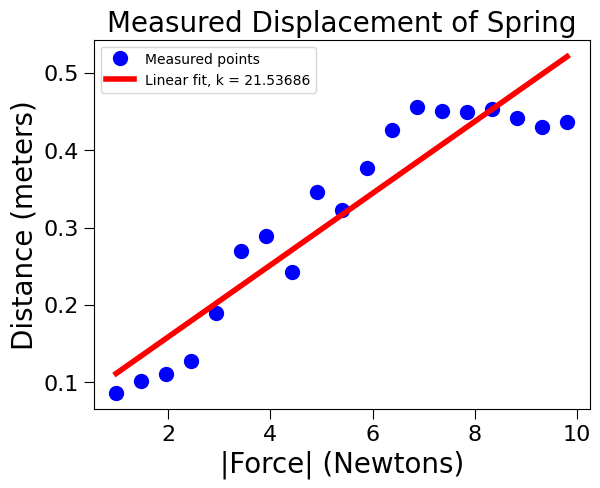

In [3]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)
    
def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()
    
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    print('a =', a, 'b =', b)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/a, 5)))
    pylab.legend(loc = 'best')
    
fitData('springData.txt')

the measured distance is the vertical displacement not the shortest distance to the line

In [ ]:
import pylab

pylab.polyfit(obx, oby, n)

n = 1 # best fit line
n = 2 # best fit parabola

# it outputs the coefficent of the equation of the new line

estYVals = pylab.polyval(model, xVals)
# to get the new y values for a best fit line

In [9]:
## coefficent of determination
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

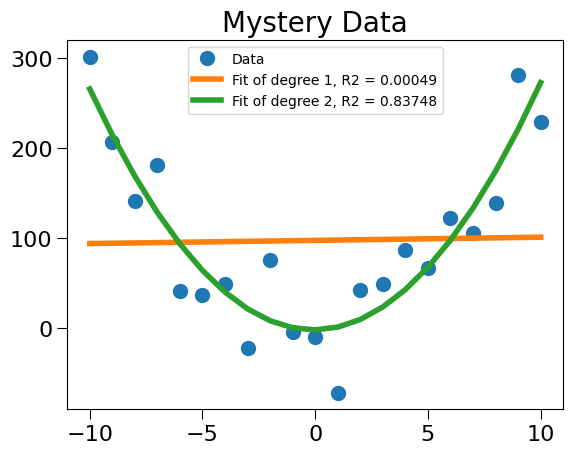

In [10]:
#code for testing goodness of fit to parabolic data

xVals, yVals = getData('mysteryData.txt')
degrees = (1, 2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

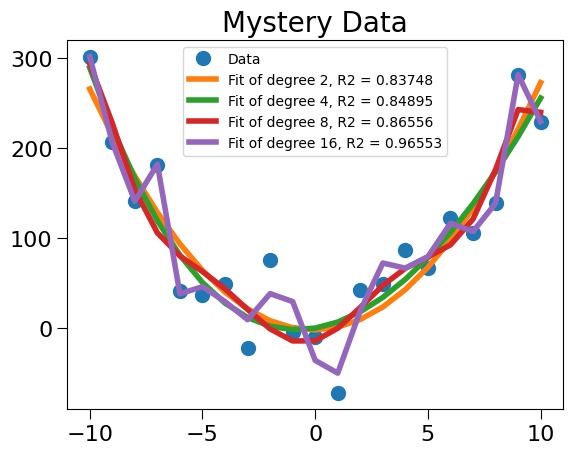

In [11]:
##Compare higher-order fits
xVals, yVals = getData('mysteryData.txt')
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')